This project aims to show if there is a correlation between the fertility in different agespans and GDP pr. capita. The hypothesis is, that with a higher GDP the fertility in the younger groups will fall and the groups ranging from 26 to 40 will increase.

I start off by importing packages and data gathered from Danmark Statistik in excelformat. The dataset is data over fertility in Denmark from 1973 to 2019 both in total and by age ranging from 15 years to 49 years.


In [1]:
# Importing modules and packages

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as pd
import pandas as pd
import ipywidgets as widgets

# Reading in Excelfile from Danmarks statistik
filename = 'data/FOD33.xlsx'
pd.read_excel(filename).head(10)


,Fertilitetskvotienter efter tid og alder,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Enhed: pr. 1.000 kvinder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Samlet fertilitet,15 år,16 år,17 år,18 år,19 år,20 år,21 år,22 år,...,42 år,43 år,44 år,45 år,46 år,47 år,48 år,49 år,Bruttoreproduktionstal,Nettoreproduktionstal
2,1973,1917,1,4.5,13.5,27,50.5,76.1,104.6,127.4,...,4.1,3.6,1.5,0.9,0.5,0.2,0,0,933.1,913.4
3,1974,1896.8,0.9,3.4,11.8,26.3,52,78.2,107.6,127.9,...,4.3,3.1,1.2,0.6,0.3,0.2,0.1,0,924.7,906.2
4,1975,1918.8,0.7,4.2,12,28.6,53,83.3,110.6,133.2,...,3.8,1.9,1.3,0.5,0.3,0,0.1,0,938.8,921.2
5,1976,1747.2,0.5,3.2,10,23.6,46.7,74.1,95.9,117.4,...,3.2,2.8,1.3,0.4,0.3,0.1,0.1,0,844.1,829
6,1977,1659.8,0.6,2.3,9.2,22.1,45.7,71.1,93.2,113,...,2.9,2.2,1.1,0.5,0.2,0,0,0.1,806.2,792.2
7,1978,1668.5,0.6,2.5,8,20.7,40.6,65.2,87.7,109.2,...,2.5,2.2,0.9,0.4,0.2,0.1,0,0,811.2,797.3
8,1979,1601.6,0.3,2.1,7.8,17.1,37.4,59.5,83.2,103,...,2.4,1.9,1.1,0.4,0.2,0.1,0,0,778.6,765.6
9,1980,1546.4,0.5,1.9,6.5,17.9,33.1,56.6,78.8,95.3,...,2.3,1.6,0.7,0.5,0.2,0.1,0,0,754.2,741.6


In order to have the best available material to base the assignment on, the data must be cleaned and manipulated to give the right datapoints. Therefore rows and columns are removed, new columns are created and the columns are given proper names. The names for the aggregated columns goes as follows:
teens: 15-20 years
e_tw (early twenties): 21-25
l_tw (late twenties): 26-30
e_th (early thirties): 31-35
l_th (late thirties): 36-40
e_f (early fourties): 41-45
l_f (late fourties): 46-49

In [2]:
# Skipping rows
fert = pd.read_excel(filename, skiprows=2)

# Making summed 5 year ageintervals for a neater analysis
fert['teens']=fert.iloc[:,2:8].sum(axis=1) # teens: 15-20 years
fert['e_tw']=fert.iloc[:,8:13].sum(axis=1) # e_tw (early twenties): 21-25 years
fert['l_tw']=fert.iloc[:,13:18].sum(axis=1) # l_tw (late twenties): 26-30 years
fert['e_th']=fert.iloc[:,18:23].sum(axis=1) # l_tw (early thirties): 31-35 years
fert['l_th']=fert.iloc[:,23:28].sum(axis=1) # l_tw (late thirties): 36-40 years
fert['e_f']=fert.iloc[:,28:33].sum(axis=1) # l_tw (early fourties): 41-45 years
fert['l_f']=fert.iloc[:,33:37].sum(axis=1) # l_tw (late fourties): 46-49 years

# Dropping columns for cleaner dataset
fert.drop(['15 år','16 år','17 år','18 år','19 år','20 år','21 år','22 år','23 år','24 år','25 år','26 år','27 år',
          '28 år','29 år','30 år','31 år','32 år','33 år','34 år','35 år','36 år','37 år','38 år','39 år','40 år',
          '41 år','42 år','43 år','44 år','45 år','46 år','47 år','48 år','49 år','Bruttoreproduktionstal',
          'Nettoreproduktionstal'],axis=1,inplace=True)

# Creating and renaming columns in dataset in a dictionary
columns_dict = {}
columns_dict['Unnamed: 0'] = 'year'
columns_dict['Samlet fertilitet'] = 'fertility'

# Renaming variables
fert.rename(columns=columns_dict,inplace=True)

# Getting summary statistics from the dataset
fert.describe()

,year,fertility,teens,e_tw,l_tw,e_th,l_th,e_f,l_f
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1996.000000,1703.687234,67.163830,363.804255,627.204255,457.238298,163.268085,24.129787,0.919149
std,13.711309,139.748813,43.467616,151.067565,48.951000,147.293222,74.748698,12.942480,0.711898
min,1973.000000,1377.400000,15.500000,169.300000,533.700000,233.700000,63.900000,8.500000,0.300000
25%,1984.500000,1664.150000,40.500000,246.600000,584.000000,291.600000,87.100000,12.700000,0.400000
50%,1996.000000,1738.300000,58.300000,332.500000,639.600000,505.700000,165.400000,21.400000,0.600000
75%,2007.500000,1785.300000,67.850000,427.100000,661.850000,597.400000,242.200000,35.300000,1.300000
max,2019.000000,1918.800000,181.800000,718.300000,717.900000,640.800000,274.600000,50.800000,3.000000


The table above shows the summary statistics of the data and below a graph of the fertility within the agespans are presented.

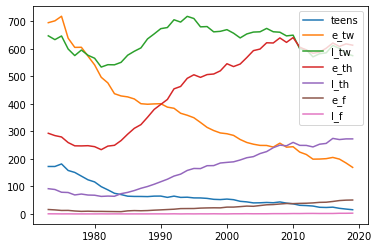

In [4]:
# Changing years to integer for consistency with the next dataset
fert['year']=fert['year'].astype(int)
fert.dtypes

# Plotting 5 year intervals
plt.plot( 'year', 'teens', data=fert)
plt.plot( 'year', 'e_tw', data=fert)
plt.plot( 'year', 'l_tw', data=fert)
plt.plot( 'year', 'e_th', data=fert)
plt.plot( 'year', 'l_th', data=fert)
plt.plot( 'year', 'e_f', data=fert)
plt.plot( 'year', 'l_f', data=fert)
plt.legend()


Now the second dataset is imported. This is data over GDP in Denmark from 1966 to 2019 in current and fixed prices which also has to be cleaned and maipulated in order to match the first dataset.

In [52]:
# Reading in second excelfile from Danmarks statistik
filename2 = 'data/NAN1.xlsx'
pd.read_excel(filename2).head(5)


,Unnamed: 0,Unnamed: 1,"Løbende priser, (mia. kr.)","2010-priser, kædede værdier, (mia. kr.)",Realvækst i forhold til foregående periode (pct.),"Pr. indbygger, løbende priser, (1000 kr.)","Bidrag til realvækst i BNP, (procentpoint)","Pr. indbygger, 2010-priser, kædede værdier, (1000 kr.)"
0,1966,"B.1*g Bruttonationalprodukt, BNP",82.4,702.4,..,17.2,..,147.0
1,1967,"B.1*g Bruttonationalprodukt, BNP",90.8,741.2,5.5,18.8,5.5,153.8
2,1968,"B.1*g Bruttonationalprodukt, BNP",101.3,782.4,5.6,20.9,5.6,161.1
3,1969,"B.1*g Bruttonationalprodukt, BNP",115.6,833.3,6.5,23.7,6.5,170.8
4,1970,"B.1*g Bruttonationalprodukt, BNP",128.1,846.6,1.6,25.9,1.6,171.5


In [53]:
# Skipping rows
gdp_1 = pd.read_excel(filename2, skiprows=2)

# Dropping columns and rows to keep the relevant statistics for the analysis
gdp_1.drop(['Løbende priser, (mia. kr.)','2010-priser, kædede værdier, (mia. kr.)',
          'Realvækst i forhold til foregående periode (pct.)',
                     'Pr. indbygger, løbende priser, (1000 kr.)',
          'Bidrag til realvækst i BNP, (procentpoint)'],axis=1,inplace=True)

gdp = gdp_1.drop([gdp_1.index[0], gdp_1.index[1], gdp_1.index[2], gdp_1.index[3], gdp_1.index[4], gdp_1.index[5], gdp_1.index[6]])

# Creating and renaming columns in second dataset in a dictionary
col_dict = {}
col_dict['Unnamed: 1'] = 'Type'
col_dict['Pr. indbygger, 2010-priser, kædede værdier, (1000 kr.)'] = 'GDP'
col_dict['Unnamed: 0'] = 'year'

# Renaming variables
gdp.rename(columns=col_dict,inplace=True)

# Changing year to integer for consistency
gdp['year']=gdp['year'].astype(int)
gdp.dtypes

# Dropping all the NaN values of GDP in the dataset
gdp = gdp.dropna(subset=['GDP'])

# Summary statistics for the dataset
gdp.describe()

,year,Type,GDP
7,1973,"B.1*g Bruttonationalprodukt, BNP",187.9
8,1974,"B.1*g Bruttonationalprodukt, BNP",184.9
9,1975,"B.1*g Bruttonationalprodukt, BNP",181.7
10,1976,"B.1*g Bruttonationalprodukt, BNP",192.0
11,1977,"B.1*g Bruttonationalprodukt, BNP",194.9


Above is the summary statistic of the dataset and below is the graph showing the timeline.

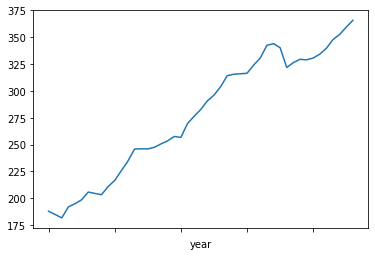

In [54]:
# Plotting the GDP
gdp.plot(x='year',y='GDP',legend=False);

The datasets are now merged in order to have a single dataset to base the analysis on. It is joined on the column year, which is the only one they have in common.

In [56]:
# Merging the two datasets on the variable year
full_data = fert.merge(gdp,how='left',on=['year'])

# Leaving out the column Type for a neater looking dataset
full_data = full_data.drop(columns='Type')

# Summary statistics for the merged dataset
full_data.describe()

,year,fertility,teens,e_tw,l_tw,e_th,l_th,e_f,l_f,GDP
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1996.000000,1703.687234,67.163830,363.804255,627.204255,457.238298,163.268085,24.129787,0.919149,277.587234
std,13.711309,139.748813,43.467616,151.067565,48.951000,147.293222,74.748698,12.942480,0.711898,57.162863
min,1973.000000,1377.400000,15.500000,169.300000,533.700000,233.700000,63.900000,8.500000,0.300000,181.700000
25%,1984.500000,1664.150000,40.500000,246.600000,584.000000,291.600000,87.100000,12.700000,0.400000,230.200000
50%,1996.000000,1738.300000,58.300000,332.500000,639.600000,505.700000,165.400000,21.400000,0.600000,282.700000
75%,2007.500000,1785.300000,67.850000,427.100000,661.850000,597.400000,242.200000,35.300000,1.300000,329.250000
max,2019.000000,1918.800000,181.800000,718.300000,717.900000,640.800000,274.600000,50.800000,3.000000,365.900000


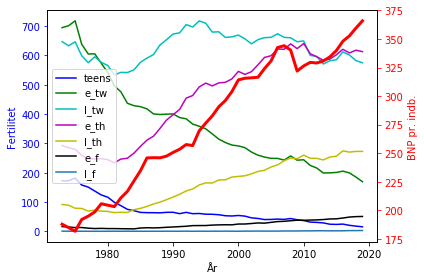

In [155]:
# Creating a plot with two y-axes, starting with defining the first y-axis and plot
fig, ax1 = plt.subplots()
t = full_data.year
s1 = full_data.teens
s2 = full_data.e_tw
s3 = full_data.l_tw
s4 = full_data.e_th
s5 = full_data.l_th
s6 = full_data.e_f
s7 = full_data.l_f
ax1.plot(t, s1, 'b', label='teens')
ax1.plot(t, s2, 'g', label='e_tw')
ax1.plot(t, s3, 'c', label='l_tw')
ax1.plot(t, s4, 'm', label='e_th')
ax1.plot(t, s5, 'y', label='l_th')
ax1.plot(t, s6, 'k', label='e_f')
ax1.plot(t, s7, label='l_f')
ax1.set_xlabel('År')

# Labeling the axis and coloring the series line
ax1.set_ylabel('Fertilitet', color='b')
ax1.tick_params('y', colors='b')

# Setting up the second y-axis and plot
ax2 = ax1.twinx()
s8 = full_data.GDP
ax2.plot(t, s8, 'r', linewidth = 3)
ax2.set_ylabel('BNP pr. indb.', color='r')
ax2.tick_params('y', colors='r')

# Giving the plot a legend and printing out the plot
fig.tight_layout()
leg1 = ax1.legend()



The visual representation of the material is shown above and it shows signs of positive correlation in the agerange of 25-40 and negative correlation in the younger agegroups.

To investigate further 5 year growth rates of the different agegroups and the gdp are created with the intention of making a correlationmatrix. 5 years growth rates might have some problems as an economic tool since it might overlook some underlying explanatory variables in fluctuation, such as economic crisis or, in regards to fertility, whether it is a large or small generation, which might lead to some large increases or decreases.
Looking at the data the 5 year growth rates looks consisten, so I will be drawing some conclusions based on them.

In [156]:
# Dropping all years that does not either end on 0 or 5.
full_data_5 = full_data[full_data['year'].isin(['1970','1975','1980','1985','1990','1995','2000','2005','2010','2015','2019'])]
full_data_5.set_index(['year'],inplace=True)

# Creating new variables that shows 5 year growth
full_data_5_change_gdp = full_data_5.GDP.pct_change()
full_data_5_change_gdp.name = 'g_5_gdp'

full_data_5_change_teens = full_data_5.teens.pct_change()
full_data_5_change_teens.name = 'g_5_teens'

full_data_5_change_e_tw = full_data_5.e_tw.pct_change()
full_data_5_change_e_tw.name = 'g_5_e_tw'

full_data_5_change_l_tw = full_data_5.l_tw.pct_change()
full_data_5_change_l_tw.name = 'g_5_l_tw'

full_data_5_change_e_th = full_data_5.e_th.pct_change()
full_data_5_change_e_th.name = 'g_5_e_th'

full_data_5_change_l_th = full_data_5.l_th.pct_change()
full_data_5_change_l_th.name = 'g_5_l_th'

full_data_5_change_e_f = full_data_5.e_f.pct_change()
full_data_5_change_e_f.name = 'g_5_e_f'

full_data_5_change_l_f = full_data_5.l_f.pct_change()
full_data_5_change_l_f.name = 'g_5_l_f'

# The dataset consisting of the created variables are now combined
full_data_5 = full_data_5.join(full_data_5_change_gdp)
full_data_5 = full_data_5.join(full_data_5_change_teens)
full_data_5 = full_data_5.join(full_data_5_change_e_tw)
full_data_5 = full_data_5.join(full_data_5_change_l_tw)
full_data_5 = full_data_5.join(full_data_5_change_e_th)
full_data_5 = full_data_5.join(full_data_5_change_l_th)
full_data_5 = full_data_5.join(full_data_5_change_e_f)
full_data_5 = full_data_5.join(full_data_5_change_l_f)
full_data_5.reset_index(inplace=True)
full_data_5 = full_data_5[full_data_5['year'].isin(['1975','1980','1985','1990','1995','2000','2005','2010','2015'])]

# The original variables are dropped
full_data_5.drop(['teens','e_tw','l_tw','e_th','l_th','e_f','l_f', 'fertility', 'GDP'],axis=1,inplace=True)

full_data_5.describe()

,year,g_5_gdp,g_5_teens,g_5_e_tw,g_5_l_tw,g_5_e_th,g_5_l_th,g_5_e_f,g_5_l_f
count,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1995.000000,0.082646,-0.209087,-0.144294,-0.008691,0.111123,0.174200,0.178308,0.309150
std,13.693064,0.055269,0.165365,0.075669,0.092444,0.163762,0.204349,0.188795,0.554052
min,1975.000000,-0.013003,-0.444635,-0.245997,-0.124961,-0.125804,-0.136709,-0.263566,-0.250000
25%,1985.000000,0.049649,-0.358089,-0.186568,-0.067483,0.037105,0.096655,0.183820,-0.050000
50%,1995.000000,0.085343,-0.175230,-0.155770,-0.015042,0.088475,0.160847,0.228007,0.058824
75%,2005.000000,0.128301,-0.088401,-0.109869,0.028284,0.206858,0.241540,0.271158,0.722222
max,2015.000000,0.147677,0.006182,-0.019663,0.167129,0.372414,0.492994,0.326667,1.250000


To see if there is some signs of correlation between a increase in GDP and fertility in the given agegroups, a correlationmatrix is created.

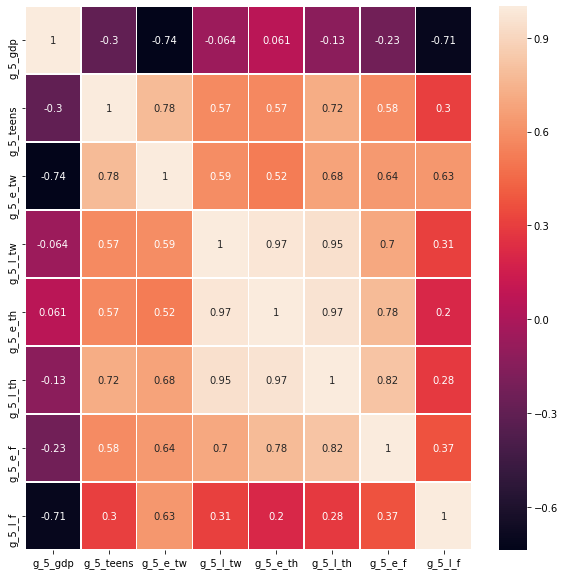

In [119]:
# Importing seaborn in order to make a heatmap
import seaborn as sn

# Collecting a subdataset in order to make a correlationmatrix
corrdata = pd.DataFrame(full_data_5, columns=['g_5_gdp','g_5_teens','g_5_e_tw', 'g_5_l_tw', 'g_5_e_th', 'g_5_l_th', 'g_5_e_f', 'g_5_l_f'])

# Correlationmatrix is created
corrmat = corrdata.corr()

# Setting up the plot as a heatmap
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(corrmat, annot=True, linewidth=.5, ax=ax)

# Adjusting top and bottom to fit it all in
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

The correlationmatrix does not entirely show what the hypothesis of the assignment started out with. Here it looks as though there is only a positive correlation, and ii is small, between growth in gdp and fertility in the early thirties, and all other groups have a negative correlation. 

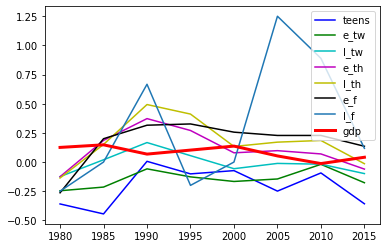

In [123]:
# Creating a plot with two y-axes, starting with defining the first y-axis and plot
fig = plt.subplots()
t = full_data_5.year
s1 = full_data_5.g_5_teens
s2 = full_data_5.g_5_e_tw
s3 = full_data_5.g_5_l_tw
s4 = full_data_5.g_5_e_th
s5 = full_data_5.g_5_l_th
s6 = full_data_5.g_5_e_f
s7 = full_data_5.g_5_l_f
s8 = full_data_5.g_5_gdp
plt.plot(t, s1, 'b', label='teens')
plt.plot(t, s2, 'g', label='e_tw')
plt.plot(t, s3, 'c', label='l_tw')
plt.plot(t, s4, 'm', label='e_th')
plt.plot(t, s5, 'y', label='l_th')
plt.plot(t, s6, 'k', label='e_f')
plt.plot(t, s7, label='l_f')
plt.plot(t, s8, 'r', label='gdp', linewidth = 3)


# Giving the plot a legend and printing out the plot
leg1 = plt.legend()

The above graph shows the growth rates in GDP and the fertility in the agegroups. It is quite messy so to make the outlook nicer, an interactive map is created.

In [157]:
# The dataset is changed from wide to long
full_data_5_long=pd.melt(full_data_5,id_vars=['year'],var_name='variable', value_name='growth')
full_data_5_long
full_data_5_long.head(100)

,year,variable,growth
0,1975,g_5_gdp,NaN
1,1980,g_5_gdp,1.254816e-01
2,1985,g_5_gdp,1.476773e-01
3,1990,g_5_gdp,6.817213e-02
4,1995,g_5_gdp,1.025130e-01
5,2000,g_5_gdp,1.367583e-01
6,2005,g_5_gdp,5.251432e-02
7,2010,g_5_gdp,-1.300272e-02
8,2015,g_5_gdp,4.105392e-02
9,1975,g_5_teens,NaN


In [149]:
# The index of the dataset is reset
full_data_5_long = full_data_5_long.reset_index()
full_data_5_long.loc[full_data_5_long.variable == 'g_5_teens', :]

,level_0,index,year,variable,growth
9,9,9,1975,g_5_teens,NaN
10,10,10,1980,g_5_teens,-0.359186
11,11,11,1985,g_5_teens,-0.444635
12,12,12,1990,g_5_teens,0.006182
13,13,13,1995,g_5_teens,-0.101382
14,14,14,2000,g_5_teens,-0.073504
15,15,15,2005,g_5_teens,-0.249077
16,16,16,2010,g_5_teens,-0.093366
17,17,17,2015,g_5_teens,-0.357724


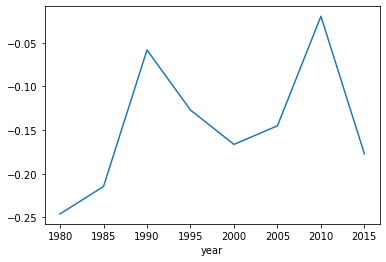

In [152]:
# Here is a simple plot of the growth rates of the teen agegroup
full_data_5_long.loc[full_data_5_long['variable'] == 'g_5_e_tw', :].plot(x='year',y='growth',legend=False);

In [153]:
# The interactive plot is set up
import ipywidgets as widgets
def plot_e(df, variable): 
    I = df['variable'] == variable
    ax=df.loc[I,:].plot(x='year', y='growth', style='-o', legend=False)

widgets.interact(plot_e, 
    df = widgets.fixed(full_data_5_long),
    variable = widgets.Dropdown(description='Variable', 
                                    options=full_data_5_long.variable.unique(), 
                                    value='g_5_teens')
); 

interactive(children=(Dropdown(description='Variable', index=1, options=('g_5_gdp', 'g_5_teens', 'g_5_e_tw', '…

Conclusion: I could not find evidence suggesting that the fertility rate in certain groups had either a positive or negative correlation with GDP.